In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [ ]:
dataset = pd.read_csv('fake_news.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
dataset.head()

,Labels,Text,Text_Tag
0,1,Says the Annies List political group supports ...,abortion
1,2,When did the decline of coal start? It started...,"energy,history,job-accomplishments"
2,3,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy
3,1,Health care reform legislation is likely to ma...,health-care
4,2,The economic turnaround started at the end of ...,"economy,jobs"


In [ ]:
dataset.shape

(10240, 3)

Meaning of the labels


*   Half-True - 2
*   False - 1
*   Mostly-True - 3
*   True - 5
*   Barely-True - 0
*   Not-Known - 4







In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Labels    10240 non-null  int64 
 1   Text      10240 non-null  object
 2   Text_Tag  10238 non-null  object
dtypes: int64(1), object(2)
memory usage: 240.1+ KB


In [ ]:
dataset.isnull().sum()

Labels      0
Text        0
Text_Tag    2
dtype: int64

In [ ]:
dataset.describe()

,Labels
count,10240.000000
mean,2.328613
std,1.650933
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,5.000000


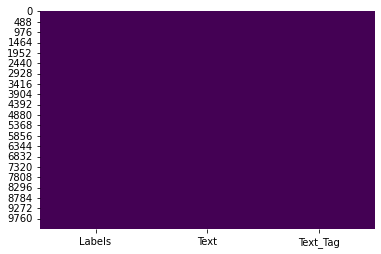

In [ ]:
sns.heatmap(dataset.isnull(),cbar=False,cmap='viridis')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


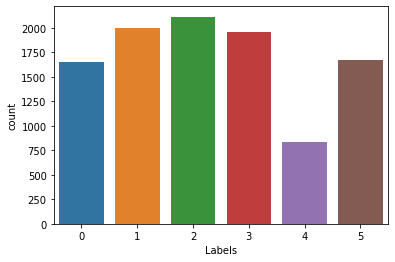

In [ ]:
sns.countplot(dataset['Labels']);

In [ ]:
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score

In [ ]:
dataset.head()

,Labels,Text,Text_Tag
0,1,Says the Annies List political group supports ...,abortion
1,2,When did the decline of coal start? It started...,"energy,history,job-accomplishments"
2,3,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy
3,1,Health care reform legislation is likely to ma...,health-care
4,2,The economic turnaround started at the end of ...,"economy,jobs"


In [ ]:
train_qs = pd.Series(dataset['Text'].tolist()).astype(str)

(-0.5, 1299.5, 949.5, -0.5)

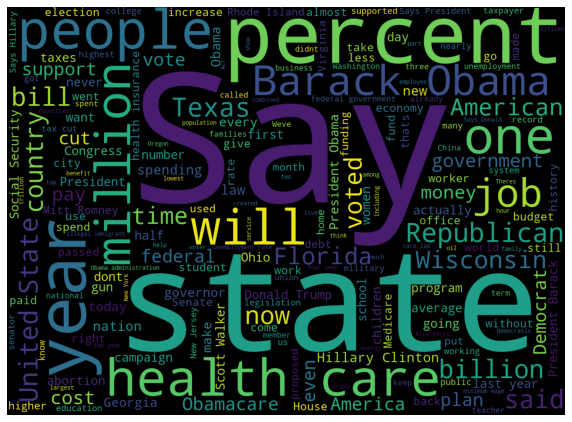

In [ ]:
from wordcloud import WordCloud
cloud = WordCloud(width=1300, height=950).generate(" ".join(train_qs.astype(str)))
plt.figure(figsize=(10, 10))
plt.imshow(cloud)
plt.axis('off')

In [ ]:
train_q = pd.Series(dataset['Text_Tag'].tolist()).astype(str)

(-0.5, 1299.5, 949.5, -0.5)

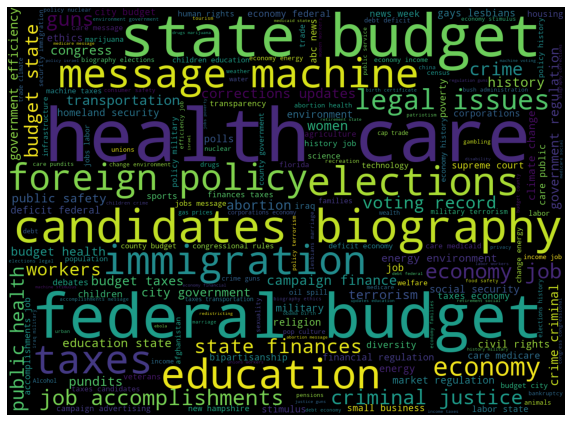

In [ ]:
cloud = WordCloud(width=1300, height=950).generate(" ".join(train_q.astype(str)))
plt.figure(figsize=(10, 10))
plt.imshow(cloud)
plt.axis('off')

In [ ]:
nltk.download('stopwords')
stopset = set(stopwords.words('english'))
vector=TfidfVectorizer(use_idf=True,lowercase=True,strip_accents='ascii',stop_words=stopset)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
vector.fit(dataset)

TfidfVectorizer(stop_words={'a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...},
                strip_accents='ascii')

In [ ]:
y=dataset.Labels
x=vector.fit_transform(dataset.Text)

In [ ]:
print(x.shape)
print(y.shape)

(10240, 12061)
(10240,)


In [ ]:
print(x)

  (0, 3252)	0.34383539825672055
  (0, 615)	0.291994452646968
  (0, 11186)	0.4135724297617053
  (0, 10931)	0.2779535206879464
  (0, 10614)	0.27033286247495936
  (0, 5075)	0.29519135963079446
  (0, 8289)	0.28805538635305655
  (0, 6575)	0.32547970735785825
  (0, 1035)	0.43192812066056746
  (0, 9587)	0.11190845341839402
  (1, 749)	0.2059771366125641
  (1, 1942)	0.2960878588752092
  (1, 4870)	0.22844050117590908
  (1, 8467)	0.15521864047896095
  (1, 1514)	0.30750358190632776
  (1, 11028)	0.20727829358907138
  (1, 4820)	0.22981688420803537
  (1, 7348)	0.28529705793190546
  (1, 10332)	0.5155835539220387
  (1, 10331)	0.2738813349007869
  (1, 2450)	0.28168714016819435
  (1, 3159)	0.3189193049374463
  (2, 5941)	0.2841866853225673
  (2, 3651)	0.39701071509484137
  (2, 1549)	0.3309512771395015
  :	:
  (10237, 7182)	0.1624731603531382
  (10237, 10097)	0.36394750688615934
  (10237, 9725)	0.3453362002774513
  (10237, 10871)	0.14867885075009182
  (10237, 9587)	0.08522324489882203
  (10238, 6533)	0.444

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=4,test_size=0.30)

In [ ]:
print(x_train.shape)
print(y_test.shape)

(7168, 12061)
(3072,)


In [ ]:
from sklearn.metrics import accuracy_score
clf = naive_bayes.MultinomialNB()
model=clf.fit(x_train, y_train)

In [ ]:
pp=model.predict(x_test)
pp

array([3, 3, 0, ..., 2, 2, 0])

In [ ]:
print ("Accuracy Score:" , accuracy_score(pp,y_test)*100)


Accuracy Score: 23.33984375


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


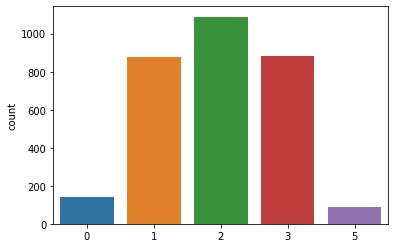

In [ ]:
sns.countplot(pp)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
tr= DecisionTreeClassifier()
tr.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
pt=tr.predict(x_test)
pt

array([0, 2, 3, ..., 3, 2, 3])

In [ ]:
print ("Accuracy Score:" , accuracy_score(pt,y_test)*100)

Accuracy Score: 20.247395833333336


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


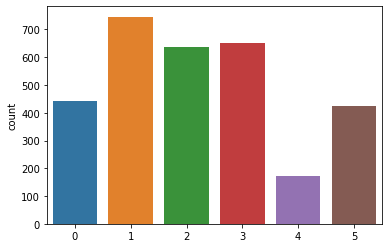

In [ ]:
sns.countplot(pt)

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [ ]:
ps=svm.predict(x_test)
ps

array([1, 3, 0, ..., 2, 2, 0])

In [ ]:
print ("Accuracy Score:" , accuracy_score(ps,y_test)*100)

Accuracy Score: 24.186197916666664


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


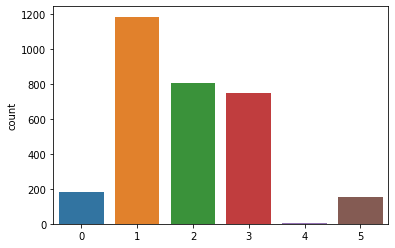

In [ ]:
sns.countplot(ps)